In [ ]:
#The architecture chosen for the CNN is based on the principles of balancing simplicity and effectiveness for solving
#the image classification problem in the Intel Image Classification Dataset. Here's a breakdown of the reasoning behind the design:


#For this task, the categorical crossentropy loss function was chosen because it is well-suited for multi-class classification problems where the
#labels are one-hot encoded as it measures the difference between true labels and predicted probabilities. 
#The Adam optimizer was used due to its ability to dynamically adapt learning rates for each parameter, combining the advantages of momentum-based
#optimization and adaptive learning rate methods. This combination ensures efficient and stable training with faster convergence and minimal 
#hyperparameter tuning, making it a robust choice for the Intel Image Classification Dataset.

#Accuracy Curves:

#If the training and validation accuracy curves converge and steadily increase, it indicates the model is learning well.
#If there’s a significant gap (training accuracy much higher than validation accuracy), the model might be overfitting.
#If both accuracies stagnate or decrease, the model might be underfitting or learning ineffectively.

#Loss Curves:

#The training loss should decrease as the model learns.
#If validation loss decreases alongside training loss, the model is generalizing well.
#If validation loss starts increasing while training loss keeps decreasing, it’s a sign of overfitting.
#If both losses plateau early, the model may need tuning (e.g., learning rate adjustments, additional layers, or more epochs).



In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # Output layer for 6 classes
])


C:\Users\PMLS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                               height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)

train_data = train_gen.flow_from_directory(r'\Users\PMLS\Desktop\ASSIGNMENT_12\seg_train', target_size=(150, 150),
                                           batch_size=32, class_mode='categorical', subset='training')

val_data = train_gen.flow_from_directory(r'\Users\PMLS\Desktop\ASSIGNMENT_12\seg_train', target_size=(150, 150),
                                         batch_size=32, class_mode='categorical', subset='validation')


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


C:\Users\PMLS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 187s 507ms/step - accuracy: 0.4179 - loss: 1.4262 - val_accuracy: 0.5310 - val_loss: 1.1833
Epoch 2/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 141s 402ms/step - accuracy: 0.5743 - loss: 1.0837 - val_accuracy: 0.6345 - val_loss: 0.9052
Epoch 3/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 142s 406ms/step - accuracy: 0.6155 - loss: 0.9962 - val_accuracy: 0.6940 - val_loss: 0.8282
Epoch 4/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 140s 399ms/step - accuracy: 0.6546 - loss: 0.9002 - val_accuracy: 0.7072 - val_loss: 0.8056
Epoch 5/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 140s 398ms/step - accuracy: 0.6955 - loss: 0.8324 - val_accuracy: 0.7407 - val_loss: 0.7132
Epoch 6/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 140s 397ms/step - accuracy: 0.7018 - loss: 0.8087 - val_accuracy: 0.7700 - val_loss: 0.6545
Epoch 7/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 146s 414ms/step - accuracy: 0.7316 - loss: 0.7406 - val_accuracy: 0.7728 - val_loss: 0.6440
Epoch 8/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 167s 476ms/step - accuracy: 0.7450 -

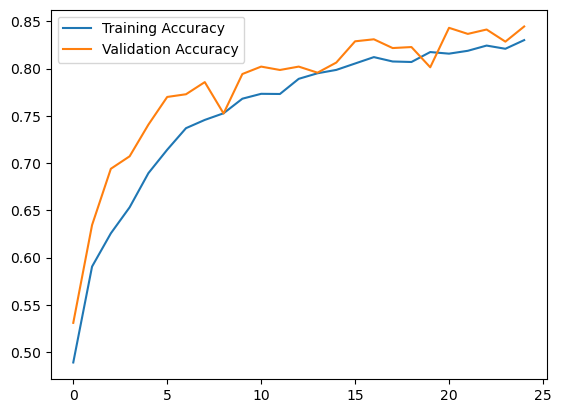

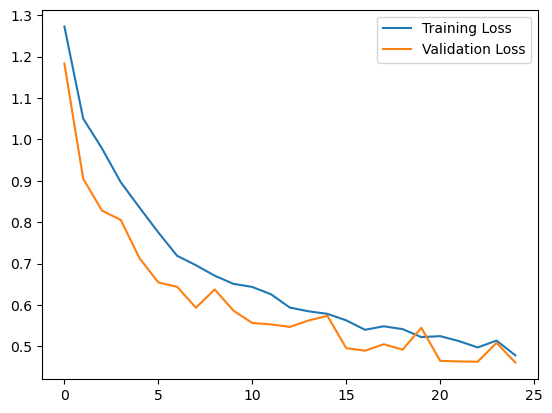

In [9]:
history = model.fit(train_data, validation_data=val_data, epochs=25)

import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [10]:
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_directory(r'\Users\PMLS\Desktop\ASSIGNMENT_12\seg_test', target_size=(150, 150), batch_size=32, class_mode='categorical')

from sklearn.metrics import classification_report

y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred_classes = y_pred.argmax(axis=-1)

print(classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys()))


Found 3000 images belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step
              precision    recall  f1-score   support

   buildings       0.17      0.19      0.18       437
      forest       0.17      0.18      0.17       474
     glacier       0.17      0.12      0.14       553
    mountain       0.14      0.14      0.14       525
         sea       0.17      0.19      0.18       510
      street       0.17      0.18      0.17       501

    accuracy                           0.16      3000
   macro avg       0.16      0.17      0.16      3000
weighted avg       0.16      0.16      0.16      3000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


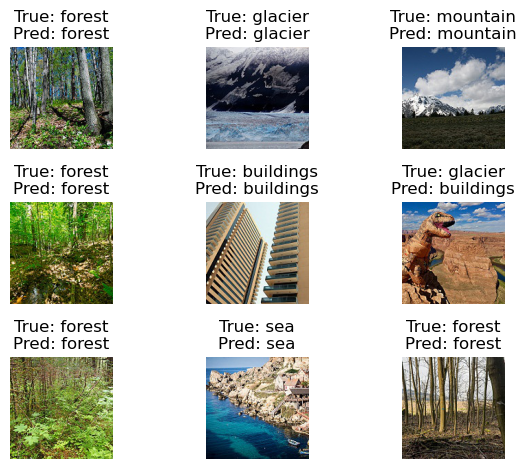

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Get some test images and predictions
test_images, labels = next(iter(test_data))
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Plot results
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[i])
    true_label = list(test_data.class_indices.keys())[labels[i].argmax()]
    pred_label = list(test_data.class_indices.keys())[predicted_classes[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
